##**Maestría en Inteligencia Artificial Aplicada**
###**Curso: Big Data**
####Tecnológico de Monterrey
####Prof Iván Olmos Pineda

### **Actividad de la Semana 6**
####**Aprendizaje supervisado y no supervisado**

**Nombre y matrícula:**

*   César Armando Prieto Siller
*   A01796382


# **1. Aprendizaje Automático (supervisado y no supervisado)**



El **aprendizaje supervisado** utiliza datos etiquetados para ayudar a predecir los resultados y su objetivo es aprender una función que, dada una muestra de datos y resultados deseados, se aproxime mejor a la relación entre entrada y salida observable en los datos.
Los modelos de aprendizaje supervisados se dividen en dos tipos:

•	**Regresión**. Modelo que genera una respuesta
numérica continua. Por ejemplo, predecir los precios de las acciones o las condiciones meteorológicas. Algunos tipos son lineal, logística y polinomial.

•	**Clasificación**: Modelo que genera una predicción a partir de un conjunto discreto de posibles resultados; es decir, la variable objetivo es de tipo categórico. Por ejemplo, predecir si una imagen médica indica un estado saludable o cáncer es un problema de clasificación binaria porque tiene dos clases, mientras que un modelo que se utiliza para segregar los correos electrónicos en varias categorías (social, educación, trabajo y familia) es un problema de clasificación multiclase. Los tipos de clasificadores son lineal, máquinas de vector soporte, árboles de decisión, vecinos k-cercanos, bosque aleatorio y redes neuronales.

Algunos ejemplos de uso de aprendizaje supervisado:
Reconocimiento de imágenes y objetos, análisis predictivo, análisis de sentimiento de clientes, segmentación de clientes, detección de spam, pronósticos, sistemas de recomendación.


El **aprendizaje no supervisado**, por otro lado, no tiene salidas etiquetadas, por lo que su objetivo es inferir la estructura natural presente dentro de un conjunto de puntos de datos.
Estos modelos funcionan por sí solos para descubrir la estructura inherente de los datos no etiquetados (aunque todavía requieren cierta intervención humana para validar las salidas). Se utilizan para tres tareas principales:

•	La **agrupación** en clústers es una técnica para agrupar datos no etiquetados en función de sus similitudes o diferencias. Es útil para la segmentación del mercado, la compresión de imágenes, etc.

•	La **asociación** utiliza diferentes reglas para encontrar relaciones entre variables en un conjunto de datos determinado. Estos métodos se utilizan con frecuencia para el análisis de la cesta de la compra y los motores de recomendación.

•	La **reducción** de la dimensionalidad se utiliza cuando el número de características (o dimensiones) en un conjunto de datos dado es demasiado alto. Reduce la cantidad de entradas de datos a un tamaño manejable al mismo tiempo que preserva la integridad de los datos. A menudo, esta técnica se utiliza en la etapa de preprocesamiento de datos.

Ejemplos de uso de aprendizaje no supervisado:
Visión por computadora, imagenología médica, detección de anomalías, sistemas de recomendación.


## **Algoritmos de ML disponibles en PySpark**

El aprendizaje automático está disponible en PySpark a través de las librerías MLlib y MLlib: API basado en RDD. En ellas podemos encontrar los diferentes tipos de algoritmos.

Regresión y clasificación:

*   Modelos lineales (SVMs, regresión logística y lineal)
*   Naive Bayes
*   Árboles de decisión, bosque aleatorio y árboles de gradiente amplificado


Clustering:
*   K-means
*   Gaussian mixture
*   power iteration clustering (PIC)
*   latent Dirichlet allocation (LDA)
*   bisecting k-means
*   streaming k-means

Reducción de dimensionalidad:
*   Descomposición en valores singulares (SVD)
*   Análisis de componentes principales (PCA)

Otros:
*   Ingeniería de características, creación de pipelines.




## **Bibliografía**

*   Belcic, I., & Stryker, C. (2025, May 13). What is supervised learning?. IBM. https://www.ibm.com/think/topics/supervised-learning

*   Ibm. (2025, May 12). What is unsupervised learning?. IBM. https://www.ibm.com/think/topics/unsupervised-learning

*   MLLib: RDD-based API - SPArk 3.5.5 Documentation. (n.d.). https://spark.apache.org/docs/latest/mllib-guide.html

# **2. Selección de los datos**

## **Descripción de la Base de datos**

Base de datos seleccionada: IBM Transactions for Anti-Money Laundering (AML), versión LI-Medium

La base de datos está compuesta por aproximadamente 31 millones de transacciones, contiene una menor proporción de casos positivos de lavado de dinero respecto a las otras versiones.

Se cuenta con información como: momento de la transacción, bancos y cuentas involucradas, montos ($) y monedas, formato y si la transacción se considera o no lavado de dinero.

## **Descripción de las reglas de particionamiento**

Variables de caracterización seleccionadas: Payment Currency y Payment Format.

Agrupación previa al particionamiento:
Payment Format:
* Online: ACH, Credit Card, Wire y Bitcoin
* Offline: Cheque, Cash y Reinvestment

Payment Currency:
* America: MXN, USD, BRL y CAD
* Others: se excluyen las monedas antes listadas

Reglas:
* *Part 1*: Payment Format = Online & Payment Currency = America
* *Part 2*: Payment Format = Online & Payment Currency = Others
* *Part 3*: Payment Format = Offline & Payment Currency = America
* *Part 4*: Payment Format = Offline & Payment Currency = Others

## **Cargando el entorno de PySpark en Google Colab**

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [4]:
!ls

sample_data  spark-3.1.1-bin-hadoop3.2	spark-3.1.1-bin-hadoop3.2.tgz


In [5]:
import findspark
findspark.init()
from pyspark import SparkContext, SparkConf, SQLContext
from pyspark.sql import SparkSession

#spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder \
                    .master("local[*]") \
                    .appName("Actividad3") \
                    .config("spark.driver.memory", "8g") \
                    .getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)
spark
spark

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
import numpy as np
import pandas as pd
from pyspark.sql.functions import count, when, isnan, col
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import mean, stddev, min, max

from pyspark.ml.feature import StandardScaler, OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.clustering import KMeans

In [9]:
df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/MNA/TC4034.10 Big Data/Tareas/S3/LI-Medium_Trans.csv",
                    header=True, sep=",", inferSchema=True)

## **Particionamiento**

In [10]:
Payment_Format_Online = ["ACH","Credit Card","Wire","Bitcoin"]
Payment_Format_Offline = ["Cheque","Cash","Reinvestment"]

Payment_Currency_America = ["Mexican Peso", "US Dollar", "Brazil Real", "Canadian Dollar"]
Payment_Currency_Others = ["Yen", "UK Pound", "Australian Dollar","Saudi Riyal", "Shekel","Yuan","Euro","Rupee","Swiss Franc","Bitcoin","Ruble"]

In [11]:
from pyspark.sql.functions import col

# Payment Format = Online y Payment Currency = America
part_1 = df.filter((col("Payment Format").isin(Payment_Format_Online)) & (col("Payment Currency").isin(Payment_Currency_America)))
print("Partición 1: Online y America")
part_1.show()

# Payment Format = Online y Payment Currency = Others
part_2 = df.filter((col("Payment Format").isin(Payment_Format_Online)) & (col("Payment Currency").isin(Payment_Currency_Others)))
print("Partición 2: Online y Resto del Mundo")
part_2.show()

# Payment Format = Offline y Payment Currency = America
part_3 = df.filter((col("Payment Format").isin(Payment_Format_Offline)) & (col("Payment Currency").isin(Payment_Currency_America)))
print("Partición 3: Offline y America")
part_3.show()

# Payment Format = Offline y Payment Currency = Others
part_4 = df.filter((col("Payment Format").isin(Payment_Format_Offline)) & (col("Payment Currency").isin(Payment_Currency_Others)))
print("Partición 4: Offline y Resto del Mundo")
part_4.show()


# Verificación de Submuestras
count_part_1 = part_1.count()
print(f"Número de filas en part_1: {count_part_1}")

count_part_2 = part_2.count()
print(f"Número de filas en part_2: {count_part_2}")

count_part_3 = part_3.count()
print(f"Número de filas en part_3: {count_part_3}")

count_part_4 = part_4.count()
print(f"Número de filas en part_4: {count_part_4}")

Partición 1: Online y America
+----------------+---------+---------+-------+---------+---------------+------------------+-----------+----------------+--------------+-------------+
|       Timestamp|From Bank| Account2|To Bank| Account4|Amount Received|Receiving Currency|Amount Paid|Payment Currency|Payment Format|Is Laundering|
+----------------+---------+---------+-------+---------+---------------+------------------+-----------+----------------+--------------+-------------+
|2022/09/01 00:15|       20|80010E6F0|  27365|8084250A0|         137.72|         US Dollar|     137.72|       US Dollar|   Credit Card|            0|
|2022/09/01 00:05|       20|80010EA30|  18234|82BC4CE30|           1.24|         US Dollar|       1.24|       US Dollar|   Credit Card|            0|
|2022/09/01 00:21|       11|8003289F0| 237264|810BA3240|           5.28|         US Dollar|       5.28|       US Dollar|   Credit Card|            0|
|2022/09/01 00:11|     2776|800816450|1190218|8486D8D10|          13.2

## **Submuestreo**

In [12]:
from pyspark.sql.functions import rand

fraccion_de_muestra = 0.2

# 'False' = el muestreo se realiza sin reemplazo.
submuestra_1 = part_1.sample(False, fraccion_de_muestra, seed=123)  # seed para reproducibilidad

submuestra_1.show()

tamaño_submuestra_1 = submuestra_1.count()
print("Tamaño de la submuestra para Online y America:", tamaño_submuestra_1)

+----------------+---------+---------+-------+---------+---------------+------------------+-----------+----------------+--------------+-------------+
|       Timestamp|From Bank| Account2|To Bank| Account4|Amount Received|Receiving Currency|Amount Paid|Payment Currency|Payment Format|Is Laundering|
+----------------+---------+---------+-------+---------+---------------+------------------+-----------+----------------+--------------+-------------+
|2022/09/01 00:15|       20|80010E6F0|  27365|8084250A0|         137.72|         US Dollar|     137.72|       US Dollar|   Credit Card|            0|
|2022/09/01 00:26|     1601|800970C80|  26669|80EE08950|         133.98|         US Dollar|     133.98|       US Dollar|   Credit Card|            0|
|2022/09/01 00:19|     1924|800AD8140|  17200|83F5A3DD0|         250.23|         US Dollar|     250.23|       US Dollar|   Credit Card|            0|
|2022/09/01 00:01|      741|800ADCDB0| 234135|80FA463E0|           7.64|         US Dollar|       7.

In [13]:
submuestra_2 = part_2.sample(False, fraccion_de_muestra, seed=123)
submuestra_2.show()
tamaño_submuestra_2 = submuestra_2.count()
print("Tamaño de la submuestra para Online y Resto del Mundo:", tamaño_submuestra_2)

+----------------+---------+---------+-------+---------+---------------+------------------+--------------+----------------+--------------+-------------+
|       Timestamp|From Bank| Account2|To Bank| Account4|Amount Received|Receiving Currency|   Amount Paid|Payment Currency|Payment Format|Is Laundering|
+----------------+---------+---------+-------+---------+---------------+------------------+--------------+----------------+--------------+-------------+
|2022/09/01 00:11|    27669|8043475E0| 119043|824C90D30|           5.82|              Euro|          5.82|            Euro|   Credit Card|            0|
|2022/09/01 00:25|     1601|800F66E21|   2589|801352771|       0.150633|           Bitcoin|      0.150633|         Bitcoin|       Bitcoin|            0|
|2022/09/01 00:06|    18328|8041E5C70| 292826|82BCBA740|          35.21|              Euro|         35.21|            Euro|   Credit Card|            0|
|2022/09/01 00:14|     1831|8011ED901| 113503|805B64B21|       3.425702|          

In [14]:
submuestra_3 = part_3.sample(False, fraccion_de_muestra, seed=123)
submuestra_3.show()
tamaño_submuestra_3 = submuestra_3.count()
print("Tamaño de la submuestra para Offline y America:", tamaño_submuestra_3)

+----------------+---------+---------+-------+---------+---------------+------------------+-----------+----------------+--------------+-------------+
|       Timestamp|From Bank| Account2|To Bank| Account4|Amount Received|Receiving Currency|Amount Paid|Payment Currency|Payment Format|Is Laundering|
+----------------+---------+---------+-------+---------+---------------+------------------+-----------+----------------+--------------+-------------+
|2022/09/01 00:15|       20|800104D70|     20|800104D70|        8095.07|         US Dollar|    8095.07|       US Dollar|  Reinvestment|            0|
|2022/09/01 00:27|       20|800104D20|     20|800104D20|           9.72|         US Dollar|       9.72|       US Dollar|  Reinvestment|            0|
|2022/09/01 00:22|     1924|8009B6B00|   1924|8009B6B00|        1704.89|         US Dollar|    1704.89|       US Dollar|  Reinvestment|            0|
|2022/09/01 00:22|       20|800AD58D0|     20|800AD58D0|     1573418.17|         US Dollar| 1573418.

In [15]:
submuestra_4 = part_4.sample(False, fraccion_de_muestra, seed=123)
submuestra_4.show()
tamaño_submuestra_4 = submuestra_4.count()
print("Tamaño de la submuestra para Offline y Resto del Mundo:", tamaño_submuestra_4)

+----------------+---------+---------+-------+---------+---------------+------------------+-----------+-----------------+--------------+-------------+
|       Timestamp|From Bank| Account2|To Bank| Account4|Amount Received|Receiving Currency|Amount Paid| Payment Currency|Payment Format|Is Laundering|
+----------------+---------+---------+-------+---------+---------------+------------------+-----------+-----------------+--------------+-------------+
|2022/09/01 00:21|    33605|80251F890|  33605|80251F890|      131510.97|              Yuan|  131510.97|             Yuan|  Reinvestment|            0|
|2022/09/01 00:07|    36214|807585840|  36214|807585840|       37746.85|              Yuan|   37746.85|             Yuan|  Reinvestment|            0|
|2022/09/01 00:01|   343558|8109A96A0| 343558|8109A96A0|        30278.1|             Rupee|    30278.1|            Rupee|  Reinvestment|            0|
|2022/09/01 00:22|   316869|815DFF590| 316869|815DFF590|         351.67|              Euro|   

# **3. Preparación de los datos**


In [16]:
# Unificar las submuestras
muestra_combinada = submuestra_1.union(submuestra_2).union(submuestra_3).union(submuestra_4)

print("Esquema de la muestra combinada:")
muestra_combinada.printSchema()

print("Primeras filas de la muestra combinada:")
muestra_combinada.show(5)

# Identificación de valores nulos
print("Conteo de valores nulos por columna:")
muestra_combinada.select([count(when(col(c).isNull(), c)).alias(c) for c in muestra_combinada.columns]).show()


# Identificación de valores atípicos (outliers)
print("Estadísticas descriptivas para columnas numéricas:")
muestra_combinada.select("Amount Paid").summary().show()
muestra_combinada.select("Payment Currency").summary().show()




Esquema de la muestra combinada:
root
 |-- Timestamp: string (nullable = true)
 |-- From Bank: integer (nullable = true)
 |-- Account2: string (nullable = true)
 |-- To Bank: integer (nullable = true)
 |-- Account4: string (nullable = true)
 |-- Amount Received: double (nullable = true)
 |-- Receiving Currency: string (nullable = true)
 |-- Amount Paid: double (nullable = true)
 |-- Payment Currency: string (nullable = true)
 |-- Payment Format: string (nullable = true)
 |-- Is Laundering: integer (nullable = true)

Primeras filas de la muestra combinada:
+----------------+---------+---------+-------+---------+---------------+------------------+-----------+----------------+--------------+-------------+
|       Timestamp|From Bank| Account2|To Bank| Account4|Amount Received|Receiving Currency|Amount Paid|Payment Currency|Payment Format|Is Laundering|
+----------------+---------+---------+-------+---------+---------------+------------------+-----------+----------------+--------------+---

Con el código anterior podemos darnos cuenta de que no hay valores nulos en el dataset, lo que hace sentido ya que es una colección de registros bancarios.
Existen muchos valores atípicos para la columna de "Amount Paid", por lo que se realizará escalamiento en el preprocesamiento.

In [17]:
# Obtener el número de filas y columnas en muestra_combinada
filas_muestra_combinada = muestra_combinada.count()
cols_muestra_combinada = len(muestra_combinada.columns)

column_names = muestra_combinada.columns
print(f"El tamaño de muestra_combinada es: {filas_muestra_combinada}")
print(f"El número de columnas en muestra_combinada es: {cols_muestra_combinada}")
print("Nombres de las columnas:")
for col_name in column_names:
    print(col_name)

El tamaño de muestra_combinada es: 6253899
El número de columnas en muestra_combinada es: 11
Nombres de las columnas:
Timestamp
From Bank
Account2
To Bank
Account4
Amount Received
Receiving Currency
Amount Paid
Payment Currency
Payment Format
Is Laundering


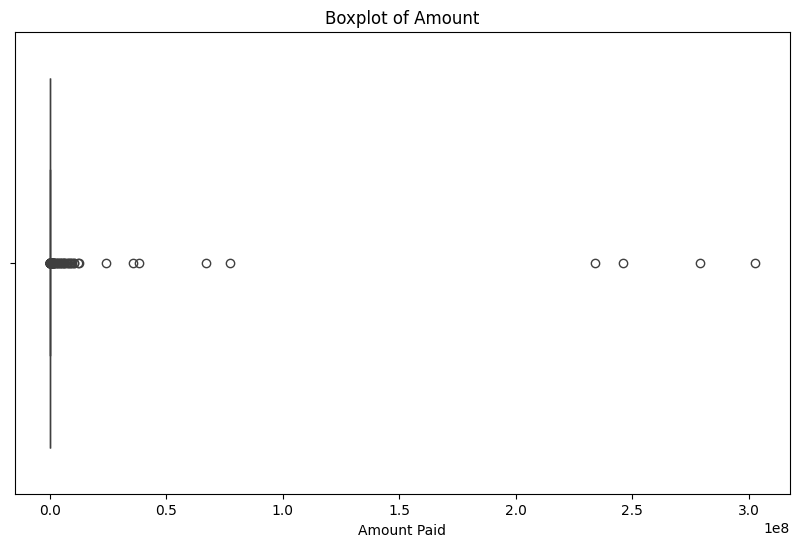

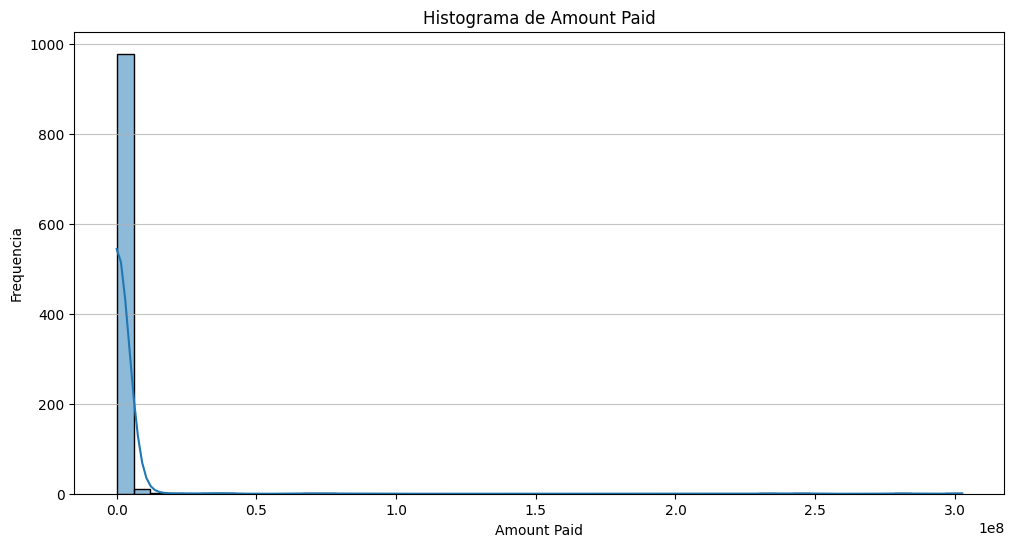

In [18]:
# Se incluyeron visualizaciones para observar los valores atípicos. Se utilizó un límite de 1000 datos
# en las funciones de pandas
pandas_sample = muestra_combinada.limit(1000).toPandas()
plt.figure(figsize=(10, 6))
sns.boxplot(x=pandas_sample['Amount Paid'])

plt.title('Boxplot of Amount')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=pandas_sample, x='Amount Paid', bins=50, kde=True) # You can adjust the number of bins

plt.title('Histograma de Amount Paid')
plt.xlabel('Amount Paid')
plt.ylabel('Frequencia')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [19]:
# Pasos de preprocesamiento
# Se escala "Amount Paid" utilizando primero VectorAssembler para vectorizar la columna y después StandardScaler,
# utilizando la desviación estándar
assembler_amount = VectorAssembler(inputCols=["Amount Paid"], outputCol="amount_vector")
scaler = StandardScaler(inputCol="amount_vector", outputCol="scaled_amount", withStd=True, withMean=False)

# Se codifican "Payment Currency" y "Payment Format" con One Hot Encoding ya que son variables categóricas
# Primero se utiliza StringIndexer para convertir las categorías en índices numéricos.
indexer_currency = StringIndexer(inputCol="Payment Currency", outputCol="currency_index")
indexer_format = StringIndexer(inputCol="Payment Format", outputCol="format_index")
# Después, se aplica el OneHotEncoder para convertir los índices en vectores codificados
encoder_currency = OneHotEncoder(inputCol="currency_index", outputCol="currency_encoded")
encoder_format = OneHotEncoder(inputCol="format_index", outputCol="format_encoded")


# Se combinan todas las características en un solo vector, como lo requieren los algoritmos de PySpark

feature_assembler = VectorAssembler(
    inputCols=["scaled_amount", "currency_encoded", "format_encoded"],
    outputCol="features_final"
)

# Se crea el Pipeline que incluirá todos los pasos de transformación definidos previamente.
preprocessing_pipeline = Pipeline(stages=[
    assembler_amount,
    scaler,
    indexer_currency,
    indexer_format,
    encoder_currency,
    encoder_format,
    feature_assembler
])

# Se utiliza el pipeline para entrenar y transformar los datos
pipeline_model = preprocessing_pipeline.fit(muestra_combinada)

muestra_combinada_processed = pipeline_model.transform(muestra_combinada)


# Revisamos el esquema con las columnas incluidas, así como las primeras líneas del DataFrame
print("Schema of the processed DataFrame:")
muestra_combinada_processed.printSchema()

print("First 5 rows of the processed DataFrame:")
muestra_combinada_processed.select("Amount Paid", "scaled_amount", "Payment Currency", "currency_index", "currency_encoded", "Payment Format", "format_index", "format_encoded", "features_final", "Is Laundering").show(5, truncate=False)


Schema of the processed DataFrame:
root
 |-- Timestamp: string (nullable = true)
 |-- From Bank: integer (nullable = true)
 |-- Account2: string (nullable = true)
 |-- To Bank: integer (nullable = true)
 |-- Account4: string (nullable = true)
 |-- Amount Received: double (nullable = true)
 |-- Receiving Currency: string (nullable = true)
 |-- Amount Paid: double (nullable = true)
 |-- Payment Currency: string (nullable = true)
 |-- Payment Format: string (nullable = true)
 |-- Is Laundering: integer (nullable = true)
 |-- amount_vector: vector (nullable = true)
 |-- scaled_amount: vector (nullable = true)
 |-- currency_index: double (nullable = false)
 |-- format_index: double (nullable = false)
 |-- currency_encoded: vector (nullable = true)
 |-- format_encoded: vector (nullable = true)
 |-- features_final: vector (nullable = true)

First 5 rows of the processed DataFrame:
+-----------+-----------------------+----------------+--------------+----------------+--------------+------------

# **4. Preparación del conjunto de entrenamiento y prueba**

In [20]:
# Después del preprocesamiento, se realiza la división de entrenamiento y prueba
# Se agrega la semilla para asegurar repetibilidad

training_ratio = 0.8
testing_ratio = 1 - training_ratio
train_data_processed, test_data_processed = muestra_combinada_processed.randomSplit([training_ratio, testing_ratio], seed=42)

# Se revisa la cantidad de renglones y columnas de cada conjunto de datos
print(f"Número de filas en el conjunto de entrenamiento: {train_data_processed.count()}")
print(f"Número de filas en el conjunto de prueba: {test_data_processed.count()}")
print(f"Número de columnas en el conjunto de entrenamiento: {len(train_data_processed.columns)}")
print(f"Número de columnas en el conjunto de prueba: {len(test_data_processed.columns)}")




Número de filas en el conjunto de entrenamiento: 5002442
Número de filas en el conjunto de prueba: 1251457
Número de columnas en el conjunto de entrenamiento: 18
Número de columnas en el conjunto de prueba: 18


# **5. Construcción de modelos de aprendizaje supervisado y no supervisado**


In [21]:
# Se definen los modelos a utilizar y se entrena utilizando los conjuntos de datos del paso anterior
# Se elige regresión logística porque la variable a predecir es categórica

target_col= "Is Laundering"

lr = LogisticRegression(labelCol=target_col, featuresCol="features_final")
lr_model = lr.fit(train_data_processed)
predictions = lr_model.transform(test_data_processed)


In [22]:
# Se muestran las predicciones realizadas incluyendo las columnas agregadas
predictions.select("features_final", "Is Laundering", "rawPrediction",
                   "prediction", "probability").show(5)


+--------------------+-------------+--------------------+----------+--------------------+
|      features_final|Is Laundering|       rawPrediction|prediction|         probability|
+--------------------+-------------+--------------------+----------+--------------------+
|(21,[0,1,16],[7.9...|            0|[8.78099684060143...|       0.0|[0.99984639872763...|
|(21,[0,1,16],[8.2...|            0|[8.78099684090429...|       0.0|[0.99984639872768...|
|(21,[0,5,17],[4.2...|            0|[5.74334953462000...|       0.0|[0.99680621463537...|
|(21,[0,1,16],[1.5...|            0|[8.78099683436002...|       0.0|[0.99984639872667...|
|(21,[0,5,16],[6.5...|            0|[8.71485728838573...|       0.0|[0.99983589784110...|
+--------------------+-------------+--------------------+----------+--------------------+
only showing top 5 rows



In [23]:
# Se crean evaluadores para revisar las métrica de Área bajo la curva Precision-Recall,
# F1-Score y recall
evaluator = BinaryClassificationEvaluator(labelCol=target_col, rawPredictionCol="rawPrediction",
                                          metricName="areaUnderPR")

areaUnderPR = evaluator.evaluate(predictions)

f1_score=MulticlassClassificationEvaluator(labelCol=target_col,
                                      predictionCol="prediction", metricName="f1").evaluate(predictions)

recall=MulticlassClassificationEvaluator(labelCol=target_col,
                                      predictionCol="prediction", metricName="weightedRecall").evaluate(predictions)

print(f"Area bajo la curva PR del modelo de regresión logística: {areaUnderPR}")
print(f"F1 Score del modelo de regresión logística: {f1_score}")
print(f"Recall del modelo de regresión logística: {recall}")



Area bajo la curva PR del modelo de regresión logística: 0.0030737411454185974
F1 Score del modelo de regresión logística: 0.999261721194979
Recall del modelo de regresión logística: 0.9995077737389299


Las métricas del F1-Score y Recall salieron muy grandes, lo que podría indicar sobreentrenamiento en el modelo ya que tenemos datos desbalanceados en la variable objetivo ("Is Laundering").

El área bajo la curva PR es demasiado bajo, lo que nos indica que el modelo tiene un rendimiento casi nulo para identificar las transacciones de lavado de dinero.

In [24]:
# Algoritmo aprendizaje automático no supervisado, K-Means
# Se utiliza la métrica WCSS para comparar la distancia de los centroides de cada cluster

K = 5
kmeans = KMeans().setK(K).setSeed(1).setFeaturesCol("features_final")
kmeans_model = kmeans.fit(train_data_processed)
predictions_clustering = kmeans_model.transform(train_data_processed)
wcss = kmeans_model.summary.trainingCost
print(f"WCSS para el K-means de las características procesadas: {wcss}")

# Métrica Silhouette para evaluar la calidad de los clústers.
evaluator_silhouette = ClusteringEvaluator(
    featuresCol="features_final",
    predictionCol="prediction",
    metricName="silhouette" # Especificamos la métrica Silhouette
)

# Calcula el Coeficiente de Silhouette
silhouette_score = evaluator_silhouette.evaluate(predictions_clustering)

print(f"Métrica de Silhouette para K means (K={K}): {silhouette_score}")


WCSS para el K-means de las características procesadas: 6079070.240929412
Métrica de Silhouette para K means (K=5): 0.39553290618809117


La métrica de WCSS nos ayuda a analizar la distancia de los centros de los clústeres para identificar la cantidad de clústers "K" óptima para nuestro modelo. Se pueden ir aumentando la cantidad de K y revisando contra el valor de WCSS hasta que la diferencia entre agregar un clúster o no sea mínima.

La métrica de Silhouette 0.39 nos indica que el clustering podría no ser muy robusto, ya sea porque las agrupaciones de datos están muy cerca unos de otros o que el conjunto de datos en general no se preste a utilizar este tipo de algoritmos.
Lo ideal es que el valor de la métrica se encuentre entre 0.7 y 1.
